In [1]:
import wave
import numpy as np
import array
import struct
import pandas as pd

In [2]:
mic = pd.read_csv('mic.csv', header = None)
data  = mic.values
data=data[0]

In [3]:
rate=8000
pcmData16Bit=data[0:16000]
print(pcmData16Bit)

[-176 -258 -398 ... 2 4 2]


In [4]:
pcmData16Bit_f=pcmData16Bit.astype(np.float32)

In [5]:
name="mic.wav"

In [6]:
def waveSetOut(outPath,pcmArray,pcmRate):
    waveF=wave.open(outPath,"wb")
    waveF.setnchannels(1)
    waveF.setsampwidth(2)
    waveF.setframerate(pcmRate)
    for val in pcmArray:
        val=round(float(val))
        dataStruct =struct.pack("<h",val)
        waveF.writeframesraw(dataStruct)
    waveF.writeframes(b"")
    waveF.close()

In [7]:
waveSetOut(name,pcmData16Bit_f,rate)

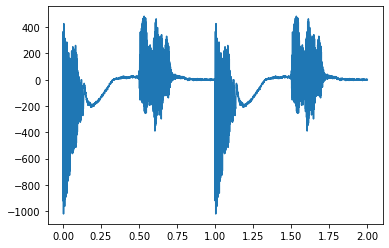

In [8]:
import wave
import numpy as np
import pylab as pl
waveAbsPath="mic.wav"
f=wave.open(waveAbsPath,"rb")
params=f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = f.readframes(nframes)
wave_data = np.frombuffer(str_data, "int16")
wave_data.shape = -1, 2
#将其转置得到：
wave_data = wave_data.T
#通过取样点数和取样频率计算出每个取样的时间：
time = np.arange(0, nframes)/framerate
pl.plot(time, wave_data.reshape((wave_data.shape[0] * wave_data.shape[1])))
pl.show()